In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import scipy
#import matplotlib.colors
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from epi.models import Parameter, Model
from epi.normalizing_flows import NormalizingFlow
from epi.util import pairplot, AugLagHPs, plot_T_x
from epi.SSSN import SSSN_sim, SSSN_sim_traj, load_SSSN_variable, \
                    get_Fano_sigma, ISN_coeff
import tensorflow as tf
import pickle
import os
from epi.example_eps import load_W

neuron_inds = {'E':0, 'P':1, 'S':2, 'V':3}

In [2]:
alpha = 'E'
ff_mean = 1.
ff_std = 0.125

ind = 62

if ind == 49:
    lim = 0.03
elif ind == 62:
    lim = 0.005
    
contrast = 0.5
W_mat = load_SSSN_variable('W', ind=ind)
hb = load_SSSN_variable('hb', ind=ind).numpy()
hc = load_SSSN_variable('hc', ind=ind).numpy()
h = (hb[None,:] + contrast*hc[None,:])

neuron_inds = {'E':0, 'P':1, 'S':2, 'V':3}
neuron_ind = neuron_inds[alpha]

M = 100
# 1. Specify the V1 model for EPI.
D = 4
lb = np.zeros((D,))
ub = lim*np.ones((D,))
sigma_eps = Parameter("sigma_eps", D, lb=lb, ub=ub)

# Define model
name = "SSSN_ff_sigma_%s_%.2E_%.2E_ind=%d" % (alpha, ff_mean, ff_std, ind)
parameters = [sigma_eps]
model = Model(name, parameters)

dt = 0.0005
T = 150
N = 50

fano = get_Fano_sigma(alpha, W_mat, h, N=N, dt=dt, T=T, T_ss=T-50, mu=ff_mean)
model.set_eps(fano)

black = np.array([0, 0, 0])
blue = '#4769A0'
red = '#AF3A31'
green = '#287C5A'
colors = [black, blue, red, green]

max_H_paths = {}
max_H_ks = {}

#sssn_sim_det = SSSN_sim(0.)
#sssn_sim_rand = SSSN_sim(eps)

In [3]:
epi_df = model.get_epi_df()
epi_df['c0'] = [al_hps['c0'] for al_hps in epi_df['AL_hps']]
epi_df['beta'] = [al_hps['beta'] for al_hps in epi_df['AL_hps']]
epi_df['elemwise_fn'] = ['affine' if 'affine' in path else 'spline' for path in epi_df['path']]
epi_df['random_seed'] = [al_hps['random_seed'] for al_hps in epi_df['arch']]
epi_df['bnmom'] = [al_hps['bn_momentum'] for al_hps in epi_df['arch']]
epi_df['ff_mean'] = [ep['mu'][0] for ep in epi_df['EP']]
epi_df['ff_std'] = [np.sqrt(ep['mu'][1]) for ep in epi_df['EP']]
epi_df['mu_len'] = [ep['mu'].shape[0] for ep in epi_df['EP']]

print(epi_df['ff_std'].unique())
print(epi_df['path'].unique())

[0.125]
['data/epi/SSSN_ff_sigma_E_1.00E+00_1.25E-01_ind=62/085ee8ec322138b4bc921e5396bacae3/D4_C3_affine_L2_U50_rs2/1fbbf40c743ff0ea891288a0df92b6a4/N100_lr1.00E-03_c0=1.00E+03_gamma2.50E-01_beta2.00E+00'
 'data/epi/SSSN_ff_sigma_E_1.00E+00_1.25E-01_ind=62/085ee8ec322138b4bc921e5396bacae3/D4_C3_affine_L2_U50_rs2/1fbbf40c743ff0ea891288a0df92b6a4/N100_lr1.00E-03_c0=1.00E+02_gamma2.50E-01_beta4.00E+00'
 'data/epi/SSSN_ff_sigma_E_1.00E+00_1.25E-01_ind=62/085ee8ec322138b4bc921e5396bacae3/D4_C3_affine_L2_U50_rs2/1fbbf40c743ff0ea891288a0df92b6a4/N100_lr1.00E-03_c0=1.00E+03_gamma2.50E-01_beta4.00E+00'
 'data/epi/SSSN_ff_sigma_E_1.00E+00_1.25E-01_ind=62/085ee8ec322138b4bc921e5396bacae3/D4_C3_affine_L2_U50_rs2/1fbbf40c743ff0ea891288a0df92b6a4/N100_lr1.00E-03_c0=1.00E+02_gamma2.50E-01_beta2.00E+00'
 'data/epi/SSSN_ff_sigma_E_1.00E+00_1.25E-01_ind=62/085ee8ec322138b4bc921e5396bacae3/D4_C3_affine_L2_U50_rs3/1fbbf40c743ff0ea891288a0df92b6a4/N100_lr1.00E-03_c0=1.00E+03_gamma2.50E-01_beta2.00E+00'
 '

data/epi/SSSN_ff_sigma_E_1.00E+00_1.25E-01_ind=62/085ee8ec322138b4bc921e5396bacae3/D4_C3_affine_L2_U50_rs1/1fbbf40c743ff0ea891288a0df92b6a4/N100_lr1.00E-03_c0=1.00E+02_gamma2.50E-01_beta4.00E+00
ff std 0.125
beta 4.0
random seed 1


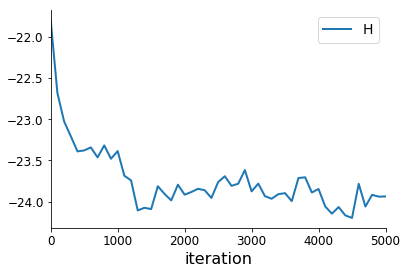

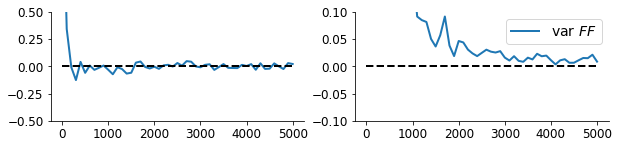

data/epi/SSSN_ff_sigma_E_1.00E+00_1.25E-01_ind=62/085ee8ec322138b4bc921e5396bacae3/D4_C3_affine_L2_U50_rs2/1fbbf40c743ff0ea891288a0df92b6a4/N100_lr1.00E-03_c0=1.00E+02_gamma2.50E-01_beta4.00E+00
ff std 0.125
beta 4.0
random seed 2


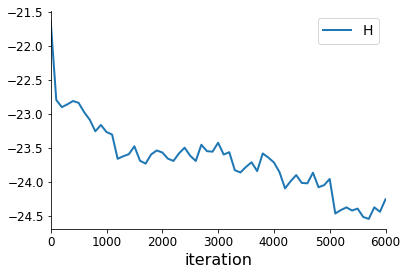

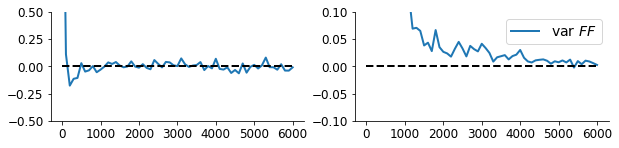

data/epi/SSSN_ff_sigma_E_1.00E+00_1.25E-01_ind=62/085ee8ec322138b4bc921e5396bacae3/D4_C3_affine_L2_U50_rs3/1fbbf40c743ff0ea891288a0df92b6a4/N100_lr1.00E-03_c0=1.00E+02_gamma2.50E-01_beta4.00E+00
ff std 0.125
beta 4.0
random seed 3


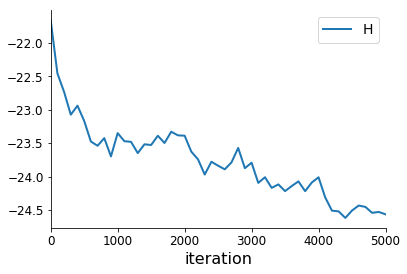

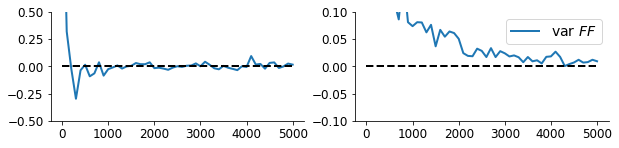

In [4]:
mu =  np.array([ff_mean, ff_std**2])
epi_df2 = epi_df[(epi_df['beta']==4.)
               & (epi_df['c0']==1e2) 
               & (epi_df['ff_std']==ff_std)]
               #& (epi_df['random_seed'] == 5)]
               #& (epi_df['mu_std']==mu_std) 
               #& (epi_df['mu_len'] == 4)]


paths = sorted(epi_df2['path'].unique())
for i, path in enumerate(paths):
    print(path)
    epi_df2 = epi_df[epi_df['path'] == path]
    print('ff std', epi_df2['ff_std'].iloc[0])
    print('beta', epi_df2['beta'].iloc[0])
    print('random seed', epi_df2['random_seed'].iloc[0])
    epi_df2.plot('iteration', 'H')
    its = [epi_df2['iteration'].min(), epi_df2['iteration'].max()]
    plt.show()
    fig, axs = plt.subplots(1,2,figsize=(10,2))
    axs[0].plot(epi_df2['iteration'], epi_df2['R1'], label=r'$FF$')
    axs[0].plot(its, [0,0], 'k--')
    axs[0].set_ylim([-.5, .5])
    axs[1].plot(epi_df2['iteration'], epi_df2['R2'], label=r'var $FF$')
    axs[1].plot(its, [0,0], 'k--')
    axs[1].set_ylim([-.1, .1])
    plt.legend()
    plt.show()

In [5]:
best_Hs = []
convergeds = []
best_ks = []
nu = 0.25
for i, path in enumerate(paths):
    print(i, path)
    _epi_df = epi_df[epi_df['path'] == path]
    df_row = _epi_df.iloc[0]
    init = df_row['init']
    init_params = {"mu":init["mu"], "Sigma":init["Sigma"]}
    nf = model._df_row_to_nf(df_row)
    aug_lag_hps = model._df_row_to_al_hps(df_row)
    best_k, converged, best_H = model.get_convergence_epoch(init_params, nf, 
                                    mu, aug_lag_hps, 
                                    alpha=0.05, nu=nu)
    best_Hs.append(best_H)
    convergeds.append(converged)
    best_ks.append(best_k)


bestHs = np.array(best_Hs)
best_ks = np.array(best_ks)

best_Hs = np.array([x if x is not None else np.nan for x in best_Hs])
ind = np.nanargmax(best_Hs)

path = paths[ind]
best_k = int(best_ks[ind])
best_H = best_Hs[ind]

0 data/epi/SSSN_ff_sigma_E_1.00E+00_1.25E-01_ind=62/085ee8ec322138b4bc921e5396bacae3/D4_C3_affine_L2_U50_rs1/1fbbf40c743ff0ea891288a0df92b6a4/N100_lr1.00E-03_c0=1.00E+02_gamma2.50E-01_beta4.00E+00
Instructions for updating:
`AffineScalar` bijector is deprecated; please use `tfb.Shift(loc)(tfb.Scale(...))` instead.


/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:2273: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


5: 0.55_0.01
1 data/epi/SSSN_ff_sigma_E_1.00E+00_1.25E-01_ind=62/085ee8ec322138b4bc921e5396bacae3/D4_C3_affine_L2_U50_rs2/1fbbf40c743ff0ea891288a0df92b6a4/N100_lr1.00E-03_c0=1.00E+02_gamma2.50E-01_beta4.00E+00
6: 0.86_0.03
2 data/epi/SSSN_ff_sigma_E_1.00E+00_1.25E-01_ind=62/085ee8ec322138b4bc921e5396bacae3/D4_C3_affine_L2_U50_rs3/1fbbf40c743ff0ea891288a0df92b6a4/N100_lr1.00E-03_c0=1.00E+02_gamma2.50E-01_beta4.00E+00
5: 0.89_0.02


In [7]:
print(path, best_k)
#path = paths[2]

#best_k = 7

data/epi/SSSN_ff_sigma_E_1.00E+00_1.25E-01_ind=62/085ee8ec322138b4bc921e5396bacae3/D4_C3_affine_L2_U50_rs2/1fbbf40c743ff0ea891288a0df92b6a4/N100_lr1.00E-03_c0=1.00E+02_gamma2.50E-01_beta4.00E+00 6


### EPI distributions

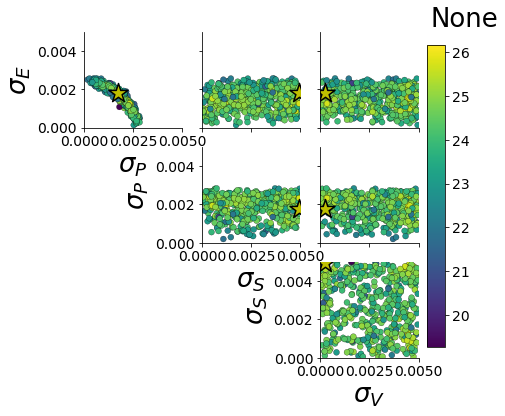

In [8]:
#path = paths[2]
#for best_k in [3]:
_epi_df = epi_df[epi_df['path'] == path]
df_row = _epi_df.iloc[0]
init = df_row['init']
init_params = {"mu":init["mu"], "Sigma":init["Sigma"]}
nf = model._df_row_to_nf(df_row)
aug_lag_hps = model._df_row_to_al_hps(df_row)
dist = model._get_epi_dist(best_k, init_params, nf, mu, aug_lag_hps)

M = 500
z, log_q_z = dist.nf(M)
z, log_q_z = z.numpy(), log_q_z.numpy()

z_mode = z[np.argmax(log_q_z), :][None,:]

alphas = ['E', 'P', 'S', 'V']
z_labels = [r'$\sigma_%s$' % alpha for alpha in alphas]
fig = pairplot(z, np.arange(4), z_labels, starred=z_mode, c_starred='y', 
               fontsize=26, figsize=(6,6), ticksize=14, s=35,
               lb=lb, ub=ub, c=log_q_z)

In [24]:
T_x_sim = model.eps(z).numpy()

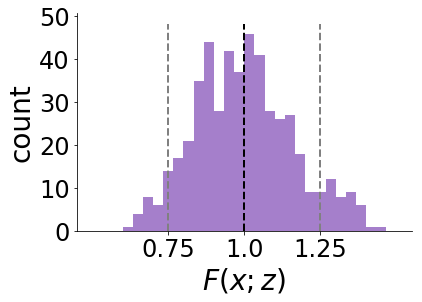

In [26]:
plot_T_x(None, T_x_sim[:,0], bins=30, xmin=.5, xmax=1.5,
             x_mean=ff_mean, x_std=ff_std, figsize=None,
             xlabel=r'$F(x; z)$', ylim=None, fontsize=28)

In [27]:
print(z_mode)

[[2.7747380e-02 2.9908607e-02 1.0897118e-03 1.3312697e-05]]
